In [1]:
import os
root_dir = '/home/tim/Dropbox/experimental/' # your path here where to parent directory where repos are
os.chdir(root_dir)
import map_data.map_methods as mm
import supervised_learning.supervised_methods as sm
import utils.global_methods as gm

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
tableau_colors = mcolors.TABLEAU_COLORS
color_dict = {name.split(':')[1]:tableau_colors[name] for name in tableau_colors}
color_list = [color_dict[name] for name in color_dict]
def get_color(idx):
    return color_list[idx%len(color_list)]
markers = ['o', 'P', 'X', '^', '1', 's', 'p', '*', 'D', 'p']
def get_marker(idx):
    return markers[idx%len(markers)]
    
import random
import numpy as np

cpu count: 8
gpu count: 1
cuda avail: True


In [2]:
astar_version = 'v1'
rooftops_verison = 'v1'
map_name = 'AirSimNH'
motion = '2d'
region = 'all'

datamap = mm.DataMap(map_name, rooftops_verison)

parent_dir = f'map_data/astar_paths/{astar_version}/{map_name}/{motion}/{region}/'
all_paths_path = f'{parent_dir}paths.p'
failed_paths_path = f'{parent_dir}failed.p'

In [3]:
# read raw data
raw_paths = []
seed_names = [fname for fname in os.listdir(parent_dir) if fname not in ['paths.p']]
for seed_name in seed_names:
    seed_dir = f'{parent_dir}{seed_name}/'
    paths_path = f'{seed_dir}paths.p'
    if not os.path.exists(paths_path):
        continue
    these_paths = gm.pk_read(paths_path)
    raw_paths = raw_paths + these_paths
print(len(raw_paths))

248260


In [14]:
# get all unique paths
xmin = -220
xmax = 220
ymin = -220
ymax = 220
unique_paths = []
path_names = {}
grid = np.ones([481, 481])
grid_start = np.ones([481, 481])
all_xs, all_ys = [], []
start_xs, start_ys = [], []
for path_idx in range(len(raw_paths)):
    start, target, path = raw_paths[path_idx]
    skip = False
    for point in path:
        x, y, z = point['position']
        if x < xmin or x > xmax or y < ymin or y > ymax:
            skip = True
            break
    if skip:
        continue
    start_pos = list(start)
    end_pos = list(target)
    name1 = str(start_pos)+str(end_pos)
    name2 = str(end_pos)+str(start_pos)
    if name1 not in path_names:
        valid = True
        for point in path:
            x, y, z = point['position']
            if x%2 != 0 or y%2 !=0 or z%2 != 0:
                print('FAULT', x, y, z)
                valid = False
                break
            for xbuffer in range(-1, 2, 1):
                for ybuffer in range(-1, 2, 1):
                    grid[x-240+xbuffer, y-240+ybuffer] += 1
            all_xs.append(x)
            all_ys.append(y)
        if valid:
            x, y, z = path[0]['position']
            grid_start[x-240, y-240] += 1
            for xbuffer in range(-1, 2, 1):
                for ybuffer in range(-1, 2, 1):
                    grid_start[x-240+xbuffer, y-240+ybuffer] += 1
            start_xs.append(x)
            start_ys.append(y)
            path_names[name1] = True
            path_names[name2] = True
            unique_paths.append([start, target, path])
        
print(len(unique_paths))

FAULT -138 45 4
FAULT 200 77 4
FAULT -200 -17 4
FAULT -206 145 4
FAULT -162 -79 4
FAULT -182 -69 4
FAULT 122 219 4
FAULT 170 165 4
FAULT 16 159 4
FAULT -126 25 4
FAULT 42 161 4
FAULT -56 -1 4
FAULT -194 149 4
FAULT 192 183 4
FAULT 32 133 4
FAULT 186 41 4
FAULT 86 153 4
FAULT -130 43 4
FAULT -216 115 4
FAULT -190 -89 4
FAULT 146 141 4
FAULT -8 61 4
FAULT 162 -13 4
FAULT -208 55 4
FAULT 206 47 4
FAULT 56 219 4
FAULT 120 205 4
FAULT 186 199 4
FAULT 20 153 4
FAULT -210 87 4
FAULT 190 47 4
FAULT 174 89 4
FAULT 166 65 4
FAULT -66 115 4
FAULT -86 213 4
FAULT 126 203 4
FAULT 152 195 4
FAULT -206 7 4
FAULT -140 63 4
FAULT 210 -7 4
FAULT -58 -175 4
FAULT -12 133 4
FAULT 120 153 4
FAULT 170 -5 4
FAULT 132 39 4
FAULT 128 -9 4
FAULT -192 195 4
FAULT -60 213 4
FAULT 186 159 4
FAULT -206 197 4
FAULT -216 149 4
FAULT -196 1 4
FAULT 204 219 4
FAULT -114 -49 4
FAULT 160 109 4
FAULT -194 199 4
FAULT -108 177 4
FAULT 196 61 4
FAULT 52 155 4
FAULT 206 33 4
FAULT -194 129 4
FAULT 42 175 4
FAULT -126 25 4
FA

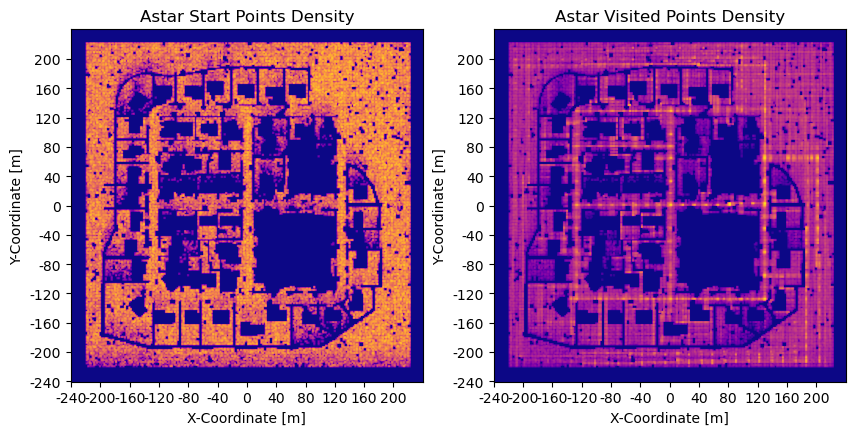

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10))

ax = axs[0]
grid2 = grid_start.copy()
#grid2[grid2 > 1000] = 1000   
grid2 = np.log(grid2)
ax.set_title('Astar Start Points Density')
ax.set_xlabel('X-Coordinate [m]')
ax.set_ylabel('Y-Coordinate [m]')
ax.imshow(grid2.T, origin='lower', cmap='plasma')
ax.set_xticks([x for x in range(0, 480, 40)], [x for x in range(-240, 240, 40)])
ax.set_yticks([y for y in range(0, 480, 40)], [y for y in range(-240, 240, 40)])

ax = axs[1]
grid2 = grid.copy()
#grid2[grid2 > 1000] = 1000   
grid2 = np.log(grid2)
ax.set_title('Astar Visited Points Density')
ax.set_xlabel('X-Coordinate [m]')
ax.set_ylabel('Y-Coordinate [m]')
ax.imshow(grid2.T, origin='lower', cmap='plasma')
ax.set_xticks([x for x in range(0, 480, 40)], [x for x in range(-240, 240, 40)])
ax.set_yticks([y for y in range(0, 480, 40)], [y for y in range(-240, 240, 40)])

plt.show()

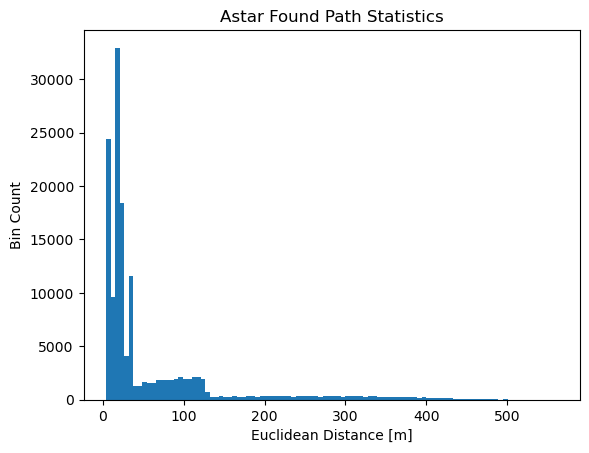

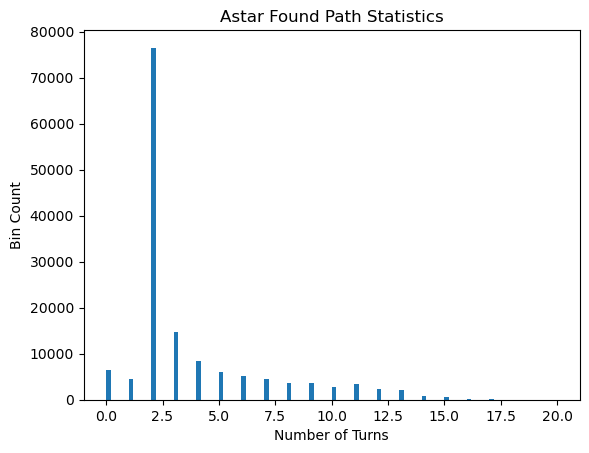

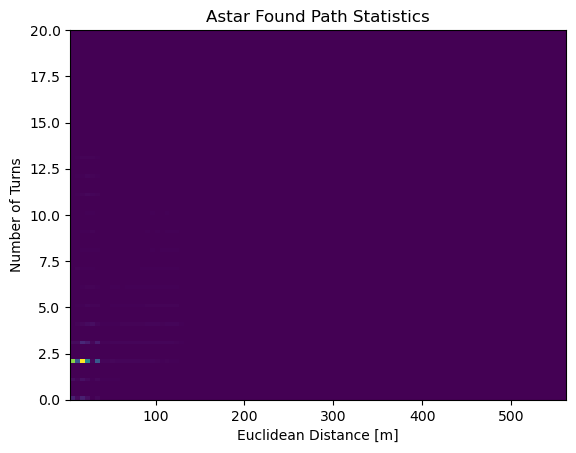

In [16]:
# get stats of each path

nturns = []
euclideans = []

def calc_nturn(path):
    return sum(['Rotate' in point['action'] for point in path])

def calc_euclidean(path):
    return np.linalg.norm(np.array(path[-1]['position'])-np.array(path[0]['position']))

for path_idx in range(len(unique_paths)):
    start, target, path = unique_paths[path_idx]
    euclidean = calc_euclidean(path)
    nturn = calc_nturn(path)
    euclideans.append(euclidean)
    nturns.append(nturn)

plt.title('Astar Found Path Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Euclidean Distance [m]')
plt.hist(euclideans, bins=100)
plt.show()

plt.title('Astar Found Path Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Number of Turns')
plt.hist(nturns, bins=100)
plt.show()

plt.title('Astar Found Path Statistics')
plt.ylabel('Number of Turns')
plt.xlabel('Euclidean Distance [m]')
plt.hist2d(euclideans, nturns, bins=100)
plt.show()

In [17]:
level_maxes = [ # noninclusive max euclidean distance, number of turns
    [32,1],
    [32,2],
    [32,3],
    [32,4],
    [64,4],
    [64,8],
    [128,8],
    [128,16],
    [256,8],
    [256,16],
    [384,16],
    [np.inf,np.inf],
]

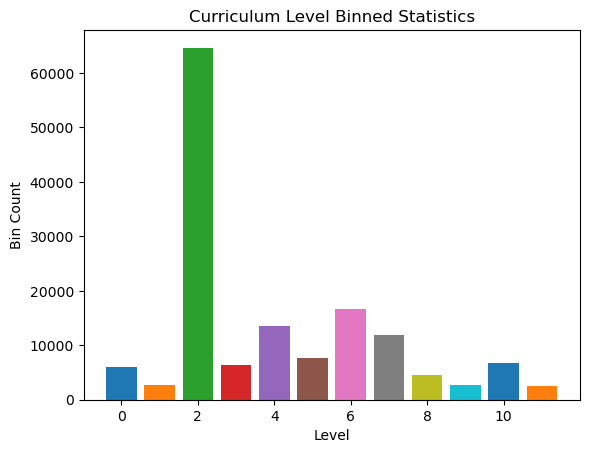

{0: 5918, 1: 2716, 2: 64629, 3: 6440, 4: 13516, 5: 7604, 6: 16722, 7: 11929, 8: 4590, 9: 2691, 10: 6814, 11: 2541}


In [18]:
# split into levels
levels = []

n_levels = len(level_maxes)
max_counts = 777_777

bins = {level:0 for level in range(n_levels)}
final_paths = []
final_starts = []
final_targets = []
final_levels = []
final_euclideans = []
final_nturns = []
for path_idx in range(len(unique_paths)):
    start, target, path = unique_paths[path_idx]
    euclidean = euclideans[path_idx]
    nturn = nturns[path_idx]
    for level in range(len(level_maxes)):
        if euclidean < level_maxes[level][0] and nturn < level_maxes[level][1]:
            if bins[level] < max_counts:
                final_paths.append(path)
                final_starts.append(start)
                final_targets.append(target)
                final_levels.append(level)
                final_euclideans.append(euclidean)
                final_nturns.append(nturn)
                bins[level] += 1
            break

plt.title('Curriculum Level Binned Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Level')
for level in bins:
    plt.bar(level, bins[level])
plt.show()
print(bins)

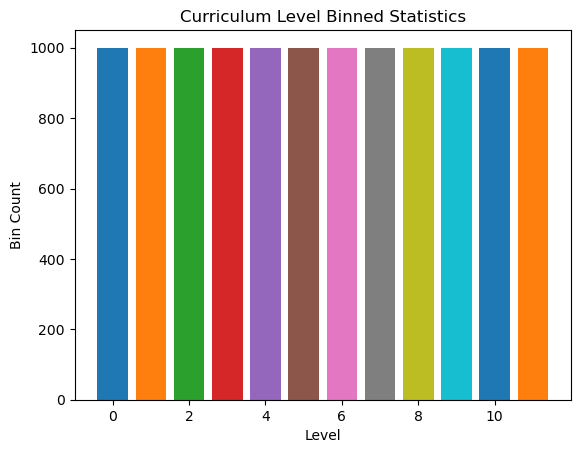

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000, 10: 1000, 11: 1000}


In [19]:
# split into levels
levels = []

n_levels = len(level_maxes)
max_counts = 1_000

bins = {level:0 for level in range(n_levels)}
final_paths = []
final_starts = []
final_targets = []
final_levels = []
final_euclideans = []
final_nturns = []
for path_idx in range(len(unique_paths)):
    start, target, path = unique_paths[path_idx]
    euclidean = euclideans[path_idx]
    nturn = nturns[path_idx]
    for level in range(len(level_maxes)):
        if euclidean < level_maxes[level][0] and nturn < level_maxes[level][1]:
            if bins[level] < max_counts:
                final_paths.append(path)
                final_starts.append(start)
                final_targets.append(target)
                final_levels.append(level)
                final_euclideans.append(euclidean)
                final_nturns.append(nturn)
                bins[level] += 1
            break

plt.title('Curriculum Level Binned Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Level')
for level in bins:
    plt.bar(level, bins[level])
plt.show()
print(bins)

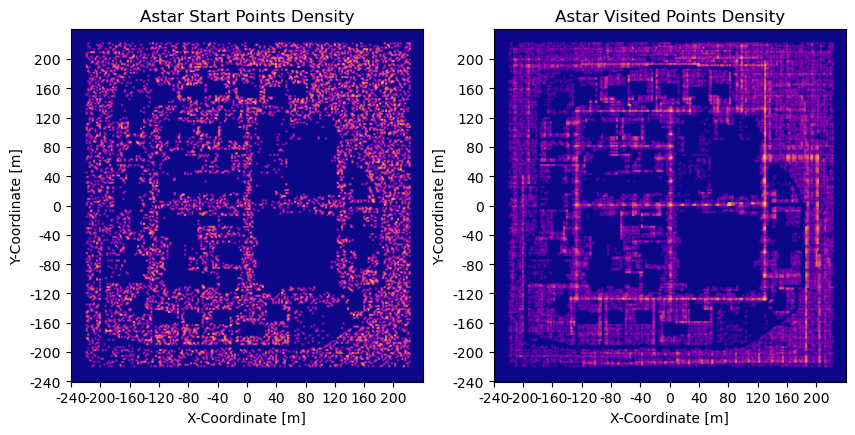

In [20]:
grid = np.ones([481, 481])
grid_start = np.ones([481, 481])
all_xs, all_ys = [], []
start_xs, start_ys = [], []
for path in final_paths:
    x, y, z = path[0]['position']
    grid_start[x-240, y-240] += 1
    for xbuffer in range(-1, 2, 1):
        for ybuffer in range(-1, 2, 1):
            grid_start[x-240+xbuffer, y-240+ybuffer] += 1
    start_xs.append(x)
    start_ys.append(y)
    for point in path:
        x, y, z = point['position']
        for xbuffer in range(-1, 2, 1):
            for ybuffer in range(-1, 2, 1):
                grid[x-240+xbuffer, y-240+ybuffer] += 1
        all_xs.append(x)
        all_ys.append(y)

fig, axs = plt.subplots(ncols=2, figsize=(10,10))

ax = axs[0]
grid2 = grid_start.copy()
#grid2[grid2 > 1000] = 1000   
grid2 = np.log(grid2)
ax.set_title('Astar Start Points Density')
ax.set_xlabel('X-Coordinate [m]')
ax.set_ylabel('Y-Coordinate [m]')
ax.imshow(grid2.T, origin='lower', cmap='plasma')
ax.set_xticks([x for x in range(0, 480, 40)], [x for x in range(-240, 240, 40)])
ax.set_yticks([y for y in range(0, 480, 40)], [y for y in range(-240, 240, 40)])

ax = axs[1]
grid2 = grid.copy()
#grid2[grid2 > 1000] = 1000   
grid2 = np.log(grid2)
ax.set_title('Astar Visited Points Density')
ax.set_xlabel('X-Coordinate [m]')
ax.set_ylabel('Y-Coordinate [m]')
ax.imshow(grid2.T, origin='lower', cmap='plasma')
ax.set_xticks([x for x in range(0, 480, 40)], [x for x in range(-240, 240, 40)])
ax.set_yticks([y for y in range(0, 480, 40)], [y for y in range(-240, 240, 40)])

plt.show()

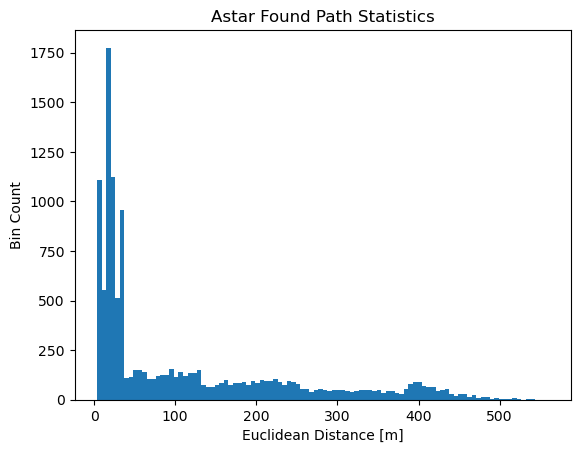

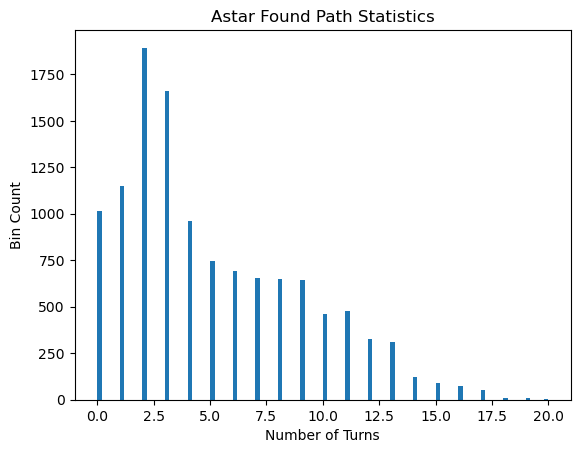

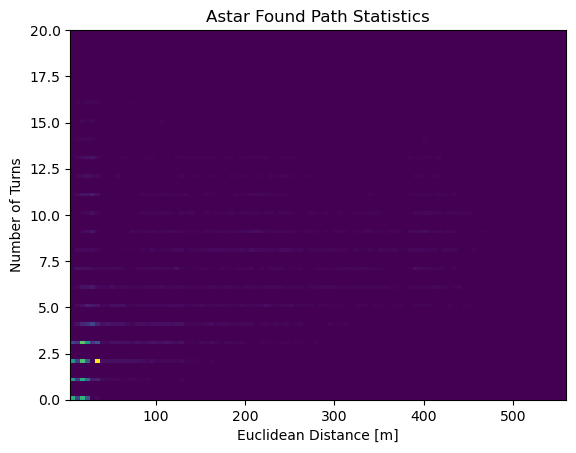

In [21]:
plt.title('Astar Found Path Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Euclidean Distance [m]')
plt.hist(final_euclideans, bins=100)
plt.show()

plt.title('Astar Found Path Statistics')
plt.ylabel('Bin Count')
plt.xlabel('Number of Turns')
plt.hist(final_nturns, bins=100)
plt.show()

plt.title('Astar Found Path Statistics')
plt.ylabel('Number of Turns')
plt.xlabel('Euclidean Distance [m]')
plt.hist2d(final_euclideans, final_nturns, bins=100)
plt.show()

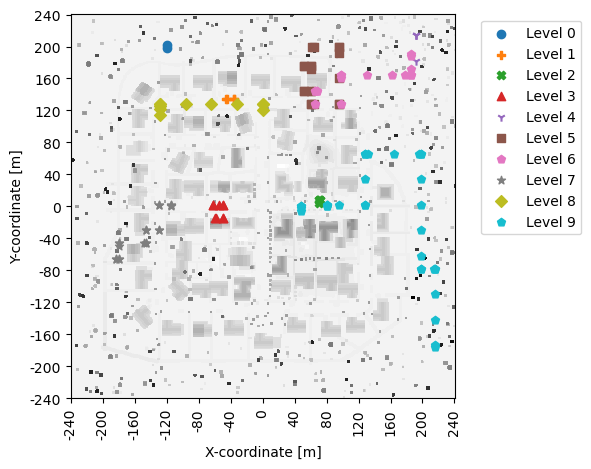

In [22]:
# sample some paths from each level and view
fig, ax = plt.subplots()
datamap.plot_map(fig, ax, show_z=False, resolution=None, x_anchor=None, y_anchor=None, cmap='Greys')
for level in range(10):
    while(True):
        path_idx = random.randint(0, len(final_paths)-1)
        if final_levels[path_idx] == level:
            break
    path = final_paths[path_idx]
    path_coords = []
    xs, ys = [], []
    for node in path:
        x, y, z = node['position']
        xs.append(x+240)
        ys.append(y+240)
    ax.scatter(xs, ys, color=get_color(level), marker=get_marker(level), label=f'Level {level}')
    
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('X-coordinate [m]')
ax.set_ylabel('Y-coordinate [m]')
plt.tight_layout()
plt.show()

In [23]:
all_paths_info = {
    'paths':final_paths,
    'starts':final_starts,
    'targets':final_targets,
    'levels':final_levels,
    'euclideans':final_euclideans,
    'nturns':final_nturns,
}
gm.pk_write(all_paths_info, all_paths_path)